<a href="https://colab.research.google.com/github/yoosoo13/yoosoo13/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C/%ED%98%BC%EA%B3%B5%ED%8C%8C4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%ED%8F%AC_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분포 파악 → 그래프(맷플롯립, 판다스 이용)
  - 산점도
  - 히스토그램
  - 상자 수염 그래프

In [1]:
# 맷플롯립 설치(코랩에는 기본으로 설치 되어 있음)
!pip install matplotlib

In [2]:
# ns_book7.csv 파일 다운
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 68.7MB/s]


'ns_book7.csv'

In [3]:
# ns_book7 데이터프레임 불러오기
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [4]:
# 맷플롯립에서 제공하는 그래프 함수 : matplotlib.pyplot패키지 불러오기
import matplotlib.pyplot as plt

## 산점도 : scatter plot
- 데이터를 2차원 좌표에 점으로 뿌려서 표현 → 데이터 분포를 확인 할 수 있음
- 2,3차원 산점도만 가능 → 한 번에 표현할 수 있는 특성 개수 한계가 있음 → '히스토그램'

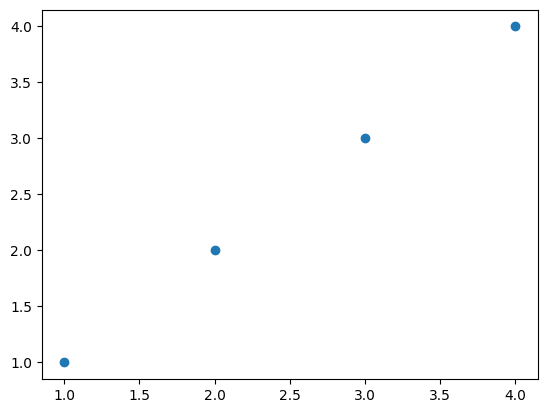

In [5]:
# (1,1), (2,2), (3,3), (4,4)로 이루어진 산점도 작성
plt.scatter([1,2,3,4], [1,2,3,4])  # ([x축좌표], [y축좌표])
plt.show()

In [6]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


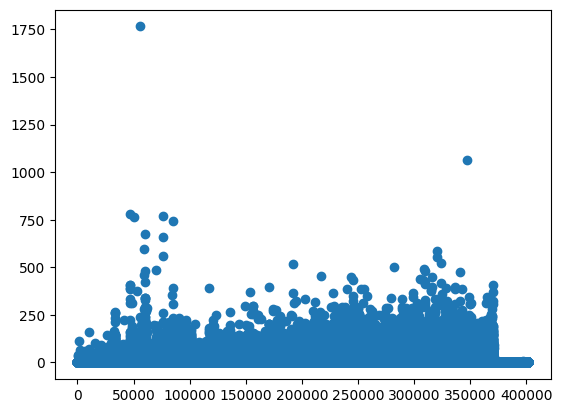

In [7]:
# ns_book7로 맷플로립 생성
plt.scatter(ns_book7['번호'], ns_book7['대출건수']) # ns_book7['번호']는 고유한 값이므로 특별한 의미를 지니고 있지 않음
plt.show()

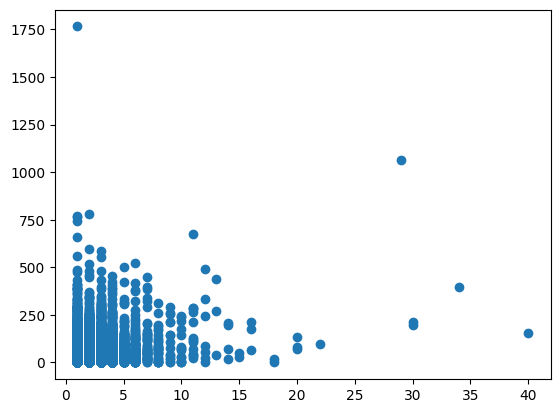

In [8]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'])
plt.show()

 1. '도서권수'가 많으면 '대출건수가'많을 것으로 예상하기 쉽지만, 위의 산점도를 보면 경향 파악이 어려움을 확인 할 수 있음
 2. 대부분의 '도서권수'가 1-2권이므로 x축 0~10범위인 왼쪽 아래 모서리 부분에 데이터가 중첩됨을 확인 할 수 있음 → 산점도에 투명도를 주면 좋음


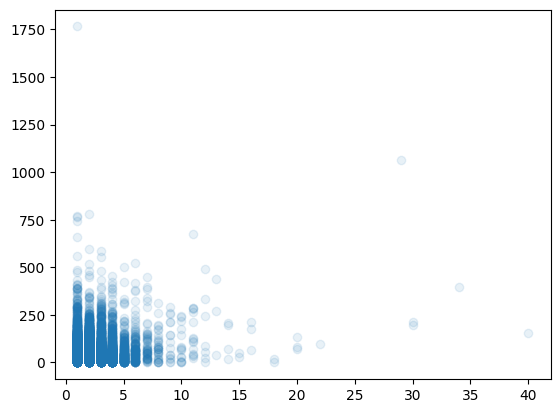

In [9]:
# 산점도에 투명도 조절하기 : alpha = 0에 가까울 수록 투명, 1에 가까울 수록 불투명
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

1. 투명도를 낮추더라도 왼쪽 아래 모서리 근처는 여전히 짙게 나타남 → 대부분의 '도서권수'가 적다는 것을 의미함
2. 즉,'도서권수'와 '대출건수' 사이의 관계를 파악하기 어렵다.
  - 전자는 양의 상관관계, 후자는 음의 상관관계가 있음

In [10]:
ns_book7.describe(percentiles=[0.25, 0.5, 0.75,0.9])

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
25%,104488.250000,2003.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
75%,302346.750000,2015.000000,1.000000,14.000000
90%,361341.100000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


> ns_book7.describe(percentiles=[0.9]) '도서권수'의 백분위 90%에 위치한 값(2) 대부분의 '도서권수'가 2보다 작다는 것을 알 수 있음

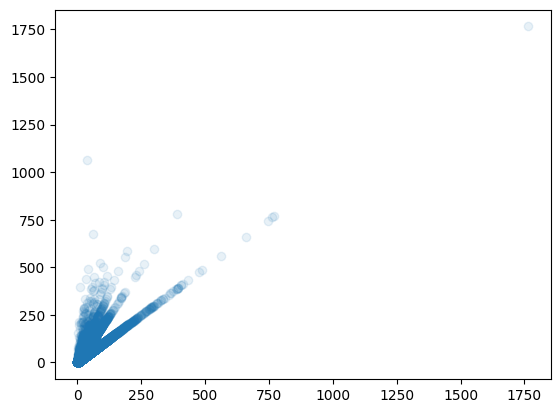

In [11]:
# x축에 '도서권수' → '대출건수'/'도서권수'로 지정하여 산점도 작성
average_borrows = ns_book7['대출건수'] / ns_book7['도서권수']
plt.scatter(average_borrows, ns_book7['대출건수'], alpha=0.1)
plt.show()

> x축('도서권수'당 '대출건수')이 증가함에 따라 y축(대출건수)가 증가함
  - '양의 상관관계가 있다'고 말할 수 있음

## 히스토그램 : histogram
- 한 특성의 데이터 분포를 볼 수 있음 ~ 전체 데이터가 어떻게 퍼져있는지 한눈에 파악 가능
- 수치형 특성의 값을 일정한 구간_bin 으로 나우어 구간 안에 포함된 데이터 개수를 막대그래프로 그린 것
  - 구간 안에 속한 데이터 개수 : 도수_frequency
- 여러 개의 특성을 비교하려면 각기 따로 그린 히스토그램을 비교해야함
  - '대출권수'와 '도서권수'열을 그린 히스토그램 처럼
  - x축, y축의 범위가 다름
  - 위 두 그래프를 비교하려면, 각 축의 범위를 맞춰서 그려야함 → '상자 수염 그래프'

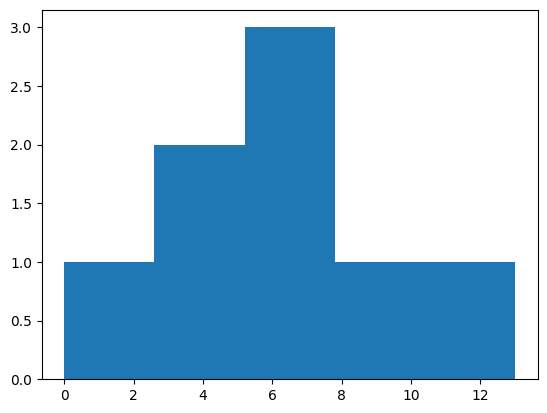

In [12]:
# bins = 5 : 데이터를 5개의 구간으로 나눔
plt.hist([0,3,5,6,7,7,9,13], bins=5)
plt.show()

1. 어느 구간에 데이터가 많은지 한눈에 보임
2. 구간이 어떻게 나누어졌는지 수치를 확인할 수 없음 → numpy에서 제공하는  histogram_bin_edges()함수 사용

In [13]:
# 넘파이의 histogram_bin_edges()사용
import numpy as np
np.histogram_bin_edges([0,3,5,6,7,7,9,13], bins=5)

array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. ])

In [14]:
# 넘파이의 randn()함수 : 표준정규분포를 따르는 랜덤한 실수(float)를 생성
# 랜덤한 값을 생성하는 randn()함수 전에 seed()함수를 사용하면 항상 같은 난수를 추출할 수 있음

np.random.seed(42)  #  seed()함수를 사용하면 유사난수 생성 = 가짜난수 생성
random_samples = np.random.randn(1000)  # 랜덤한 실수를 1,000개 생성

In [15]:
# 1,000개의 실수로 이루어진 random_samples 배열이 표준정규분포를 따르고 있는지 확인 → 평균, 표준편차 계산
print(np.mean(random_samples), np.std(random_samples))

0.01933205582232549 0.9787262077473543


> 평균_mean이 0, 표준편차_std가 1에 가까울 수록 표준정규분포를 따른다고 볼 수 있다.
  - random_samples의 평균 : 0.2, random_samples의 표준편차 : 0.98이므로 표준정규분포를 따른다고 볼 수 있다.

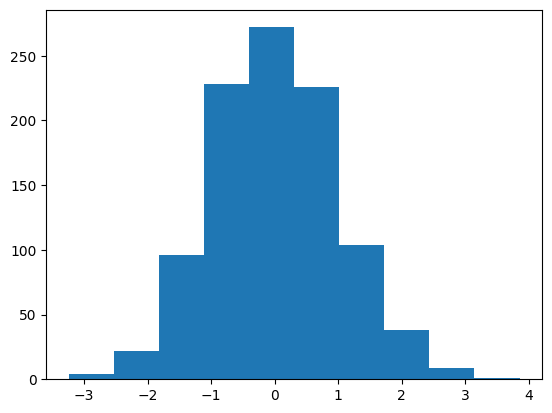

In [16]:
# 표준정규분포를 따른다면, histogram이 종 모양 분포를 띌 것이다.
plt.hist(random_samples)
plt.show()

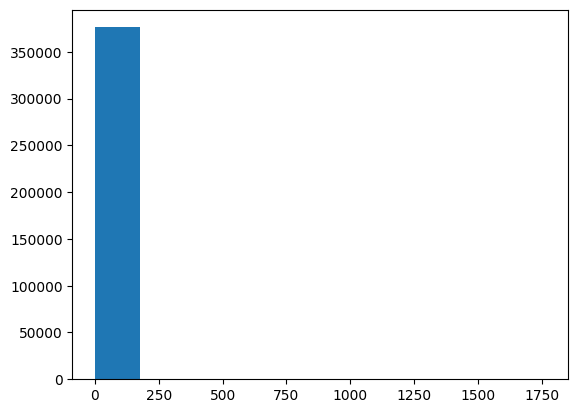

In [17]:
# ns_book7에서 수치 데이터 '대출건수'열의 분포를 확인
plt.hist(ns_book7['대출건수'])
plt.show()

1. '대출건수'열의 90% 백분위 값 : 28 → 첫번째 구간의 도수가 너무 커서 다른 구간에는 도수 값이 표시되지 않은 현상 발생

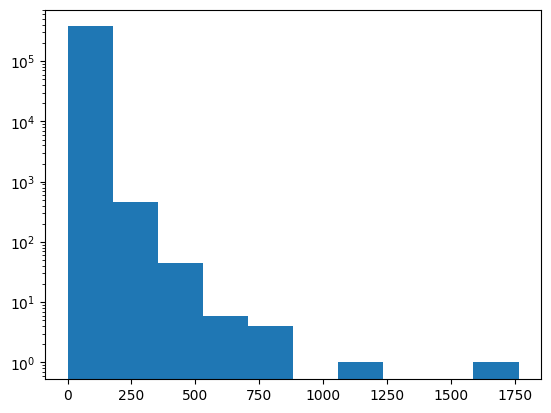

In [18]:
# 구간 조정하기 : 한 구간의 도수가 너무 커서 다른 구간에는 도수가 표시되지 않는 현상 → y축을 로그 스케일로 바꾸어 해결
# 로그 스케일_log scale로 바꾼다는 것 : y축에 로그함수를 적용한다는 것(큰 값일수록, 도수크기가 많이 줄어 들어 작은 값과의 차이가 줄어듬)

plt.hist(ns_book7['대출건수'])
plt.yscale('log')
plt.show()

1. 맷플롯립은 기본적으로 밑이 10인 로그 함수를 사용
  - y축의 눈금 스케일이 (10의0제곱)에서 (10의 5제곱)까지 나타나 있음
  - 눈금을 읽을 때는 지수 부분 고려해서 읽으면 됨
    > 예시
    - 첫 번째 구간의 도수는 약 370,000
    - → 로그 스케일로 변환된 그래프 (10의5제곱) 다음 작은 눈금이 2*(10의5제곱) = 200,000
    - → 그 다음 작은 눈금 300,000
    - 첫번째 구간의 도수는 300,000은 넘지만 400,000에 채 못 미치는 것을 알 수 있음

    > 더 쉽게 풀이
    - 로그 스케일로 변환된 그래프에서 눈금은 10의 지수 형태로 표현
    - y축 눈금의 첫 번째 값은 (10의 0제곱)에 해당하는 1
    - 그 다음 작은 눈금은 (10의 1제곱)에 해당하는 10, 그 다음은 (10의 2제곱)에 해당하는 100, 그 다음은 (10의 3제곱)에 해당하는 1000, 이런 식으로 쭉쭉 올라감
    - 첫 번째 구간의 도수가 약 370,000
      -  이 값은 (10의 5제곱)에 해당하는 100,000을 넘어서고 (10의 6제곱)에 해당하는 1,000,000에도 못 미침
    - 첫 번째 구간의 도수인 370,000은 100,000을 넘지만 1,000,000에는 미치지 못하는 것을 알 수 있음

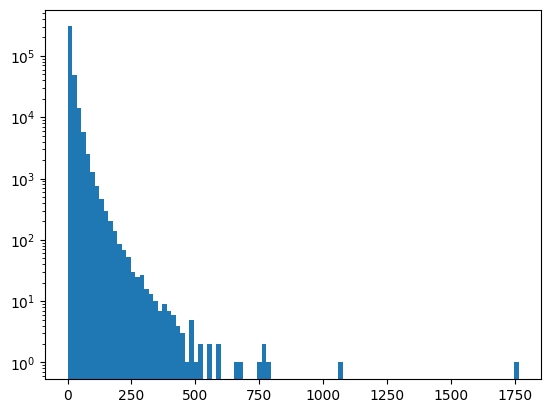

In [19]:
# x축 구간을 세세하게 나누어 보자
plt.hist(ns_book7['대출건수'], bins=100) # 구간을 100개로 나눔
plt.yscale('log')
plt.show()

1. '대출건수' 0이 가장 많음
2. '대출건수'가 증가함에 따라 도수가 줄어든다 = 정규분포와는 거리가 멀다

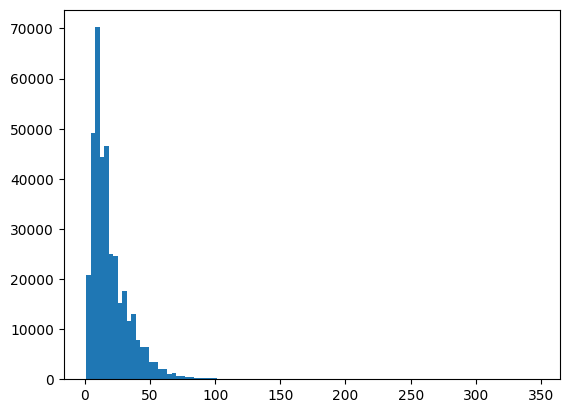

In [20]:
# '도서명'길이_len은 정규분포에 가까울까?
title_len = ns_book7['도서명'].apply(len) # 데이터프레임에 len()함수를 반복 적용
plt.hist(title_len, bins=100)
plt.show()

1. '대출권수' 만큼은 아니지만 왼쪽에 편중된 그래프 → x축에 데이터가 골고루 그려질수록 바꿀 수 있을까?
  - x축에도 로그 스케일 적용해보자 : xscale()함수

In [21]:
# '도서명'통계요약정보
ns_book7['도서명'].describe(include='object')

count     376770
unique    336408
top        승정원일기
freq         250
Name: 도서명, dtype: object

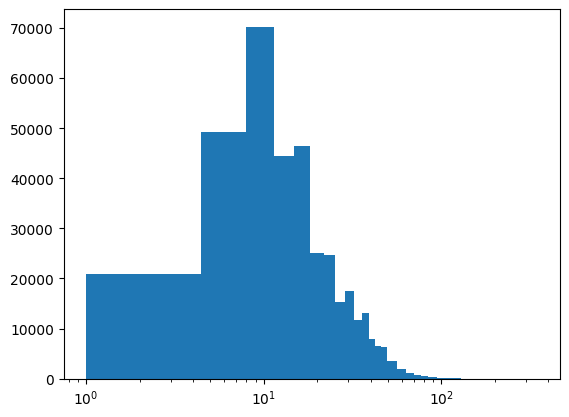

In [22]:
# xscale()적용
plt.hist(title_len, bins=100)
plt.xscale('log')
plt.show()

## 상자 수염 그래프 : box-and-whisker plot
- 최솟값, 세 개의 사분위수, 최댓값 → 5개의 숫자를 사용해 데이터를 요약하는 그래프
- boxplot()함수로 한 개 이상의 데이터프레임 열을 전달하여 그래프 작성

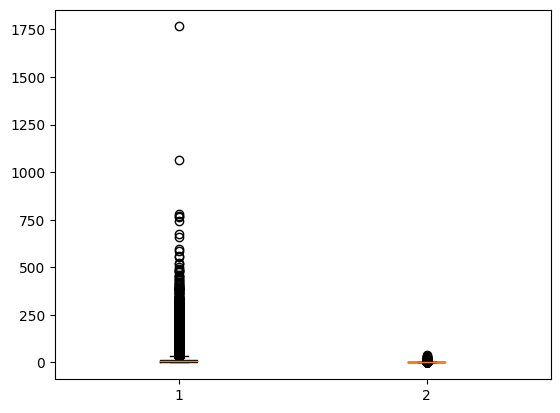

In [23]:
# boxplot()함수로 ns_book7데이터에서 '대출건수', '도서권수'열의 상자 수염 그래프 작성
plt.boxplot(ns_book7[['대출건수','도서권수']])
plt.show()

1. 1번상자(대출건수), 2번상자(도서권수) 데이터는 사분위수가 매우 작아서 직사각형 상자가 거의 안보임
2. yscale('log') 사용해보기

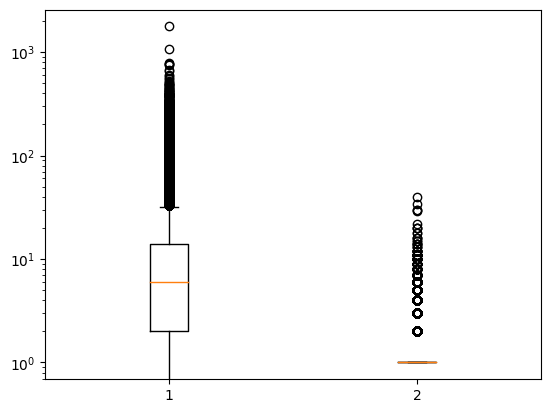

In [24]:
# yscale('log')사용
plt.boxplot(ns_book7[['대출건수', '도서권수']])
plt.yscale('log')
plt.show()

1. 2번상자(도서권수) 데이터는 여전히 안보임(이유. '도서권수'열의 사분위수는 모두 1이므로 상자가 보이지 않음)

In [25]:
ns_book7['도서권수'].describe()

count    376770.000000
mean          1.145540
std           0.473853
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          40.000000
Name: 도서권수, dtype: float64

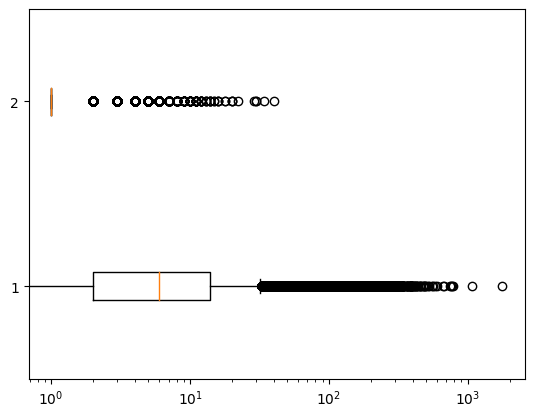

In [26]:
# 상자 수염 그래프 수평으로 그리기 : vert()매개변수 사용
plt.boxplot(ns_book7[['대출건수', '도서권수']], vert=False)
plt.xscale('log')
plt.show()

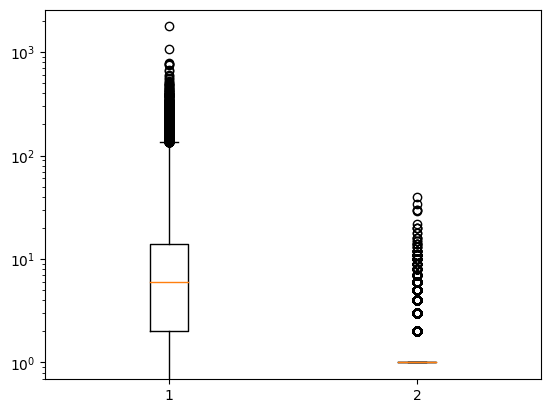

In [27]:
# 상자 수염 그래프 수염 길이 조정하기 :whis()매개변수 사용
# 기본적인 수염의 길이 : IQR의 1.5배열
plt.boxplot(ns_book7[['대출건수', '도서권수']], whis=10) # whis매개변수로 기본값 1.5 → 10으로 변경 → IQR의 10배 범위 안에서 가장 멀리 떨어진 데이터까지 그래프로 표현
plt.yscale('log')
plt.show()

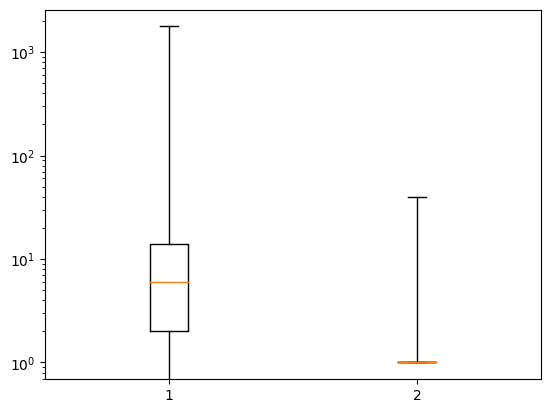

In [28]:
# whis()매개변수 백분율 지정
plt.boxplot(ns_book7[['대출건수', '도서권수']], whis=(0,100)) # 0~100% = 처음부터 마지막 데이터까지 그래프로 표현
plt.yscale('log')
plt.show()

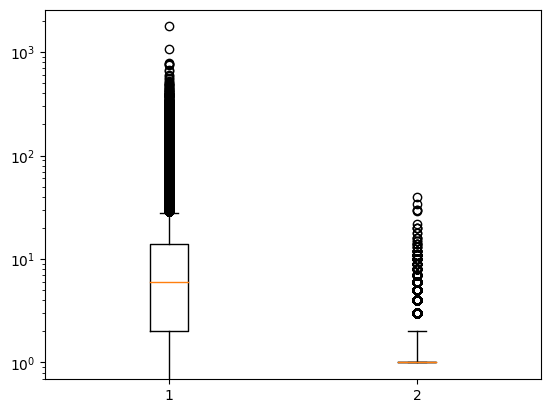

In [29]:
plt.boxplot(ns_book7[['대출건수', '도서권수']], whis=(10,90)) # 10~90% = 처음부터 마지막 데이터까지 그래프로 표현
plt.yscale('log')
plt.show()

_______
# 판다스의 그래프함수

## 그래프에 한글 출력
```
[1단계]
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```
```
[2단계]
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
```

In [30]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

In [31]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 산점도 : scatter()
- 맷플롯립과 달리 데이터프레임에 x축, y축에 해당하는 열 이름만 지정하면 됨

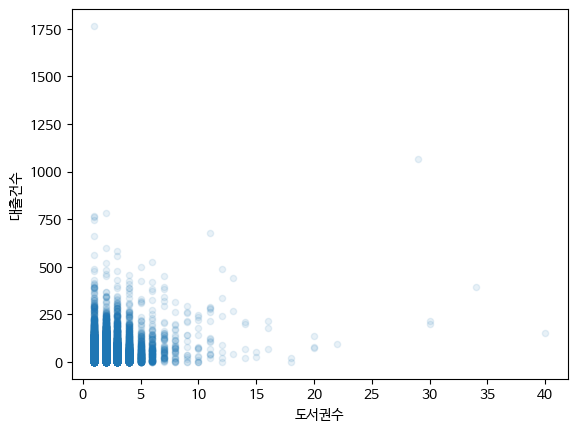

In [32]:
# x축 : '도서권수', y축 : '대출건수', alpha :  투명도 지정
ns_book7.plot.scatter('도서권수', '대출건수', alpha=0.1)
plt.show()

## 히스토그램 : histogram
- 맷플롯립에서는 '도서명' 길이_len에 대한 객체를 따로 생성함
- 판다스는 데이터프레임에 apply()메서드를 적용한 다음 바로 plt.hist()메서드 호출 가능

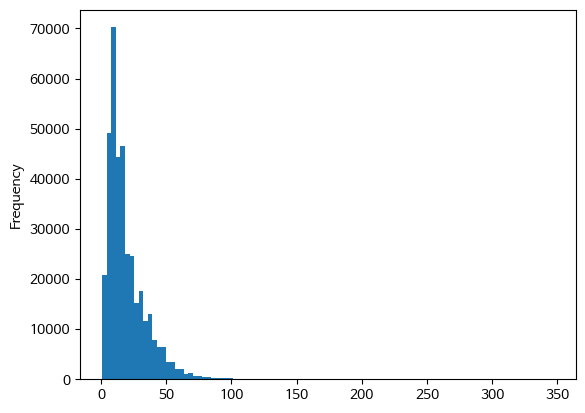

In [33]:
ns_book7['도서명'].apply(len).plot.hist(bins=100)
plt.show()

## 상자 수염 그래프

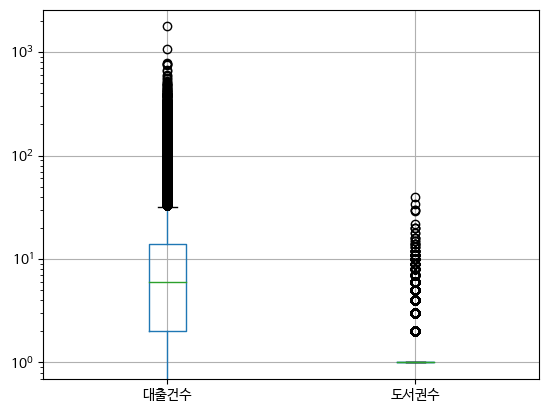

In [34]:
ns_book7[['대출건수', '도서권수']].boxplot()
plt.yscale('log')
plt.show()

____
# p279 문제5~6

In [35]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [36]:
ns_book7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376770 entries, 0 to 376769
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   번호       376770 non-null  int64 
 1   도서명      376770 non-null  object
 2   저자       376770 non-null  object
 3   출판사      376770 non-null  object
 4   발행년도     376770 non-null  int64 
 5   ISBN     376770 non-null  object
 6   세트 ISBN  55866 non-null   object
 7   부가기호     308252 non-null  object
 8   권        61793 non-null   object
 9   주제분류번호   359792 non-null  object
 10  도서권수     376770 non-null  int64 
 11  대출건수     376770 non-null  int64 
 12  등록일자     376770 non-null  object
dtypes: int64(4), object(9)
memory usage: 37.4+ MB


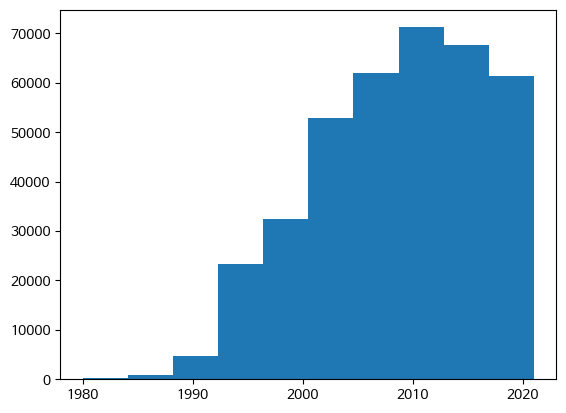

In [41]:
# 5번. ns_book7 남산도서관 대출 데이터에서 1980~2022년 사이에 발행된 도서를 선택하여 '발행년도'열의 히스토그램 작성

# 1. '발행년도'열에서 1980~2022년인 행 선택하는 조건 만들기
selected_rows = (ns_book7['발행년도'] >= 1980) & (ns_book7['발행년도'] <= 2022)
# 2. loc메서드로 조건에 해당 '발행년도'열을 선택하여 히스토그램 만들기
plt.hist(ns_book7.loc[selected_rows, '발행년도'])

plt.show()


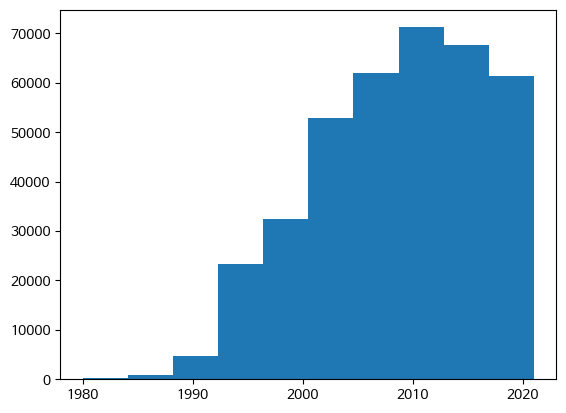

In [43]:
# 5번 다른방법
plt.hist(ns_book7.loc[(ns_book7['발행년도'] >= 1980) & (ns_book7['발행년도'] <= 2022), '발행년도'])
plt.show()

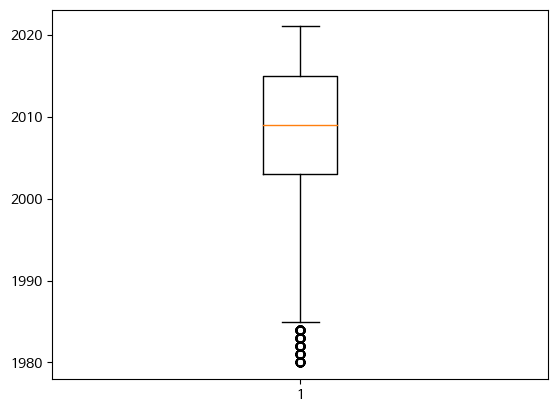

In [47]:
# 6번 . 문제5번에서 선택한 도서로 '발행년도'열의 상자 수염 그래프 작성
plt.boxplot(ns_book7.loc[selected_rows, '발행년도'])
plt.show()